1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


Integral of the original histogram =  80
Integral of the sum of the gaussians =  79.99966854351295
Integral (normalized) of the sum of the gaussians =  80.0


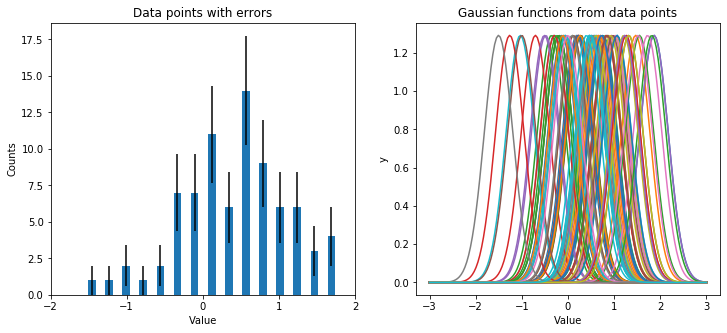

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, linregress
from scipy.integrate import trapz
x=np.random.normal(0.4571,0.7215,(80,))                 # generates the x samples

# First plot
fig, axes = plt.subplots(1,2,figsize=(12,5))
bin_value, bin_edge = np.histogram(x, bins=15)          # generates the histogram points
axes[0].bar(bin_edge[:-1],bin_value,align='edge',yerr=np.sqrt(bin_value),width=0.1)      # plots the instogram
axes[0].set_title("Data points with errors")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Counts")
axes[0].set_xticks(np.arange(round(bin_edge[0]),round(bin_edge[-1])+1))

# Second plot
range_values=np.linspace(-3,3,150)                      # generates the points in which the gaussian functions will be defined
err=1.06*x.std()*x.size**(-1/5)
list_gaussian=np.array([norm.pdf(range_values,loc=x[i],scale=err) for i in range(len(x))])    # generates the gaussian functions
for i in range(len(x)):
    axes[1].plot(range_values,list_gaussian[i])            # plots all the gaussians
axes[1].set_title("Gaussian functions from data points")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("y")

# Last purpose
integral1=np.sum(bin_value)                                # calculates the integral as the sum of the bin contents
print('Integral of the original histogram = ',integral1)
sum_gaussian=np.sum(list_gaussian,axis=0)
integral2=trapz(sum_gaussian,x=range_values)
print('Integral of the sum of the gaussians = ',integral2)
sum_gaussian/=integral2/integral1                          # normalizes the gaussian 
print('Integral (normalized) of the sum of the gaussians = ',trapz(sum_gaussian,x=range_values))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-12-20 22:50:51--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-12-20 22:50:51--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf1ba8a0f951beeae30d766d600.dl.dropboxusercontent.com/cd/0/inline/BcNFmlzDmkUyOh2HArxG9eYknpPjmkYWiH7OFltS0YnqoKE6qQBYr3t-WgVk9JCws9ziAiitTgPL_ynYGZ6Y3KjFBLBL3ABgdPNq8dci5hlKbFqlzbD6SZbHshx7dYG_rceLp3pGo5uNUW753lmIXLyQ/file# [following]
--2021-12-20 22:50:52--  https://ucf1ba8a0f951beeae30d766d600.dl.dropboxusercontent.com/cd/0/inline/BcNFmlzDmkUyOh2HArxG9eYknpPjmkYWiH7OFltS0YnqoKE6qQBYr3t-WgV

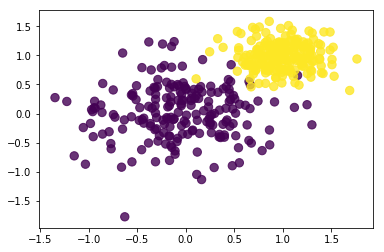

In [127]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

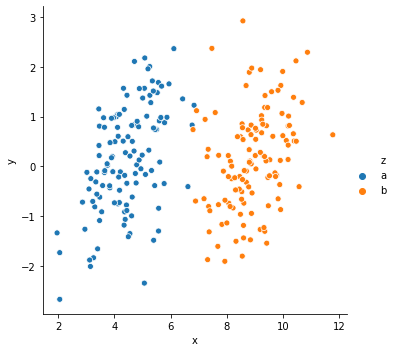

In [2]:
import seaborn as sns
import pandas as pd

seed=np.random.seed(2)
def generation_2D_datasets(size):
    mean=np.random.rand(2)*10       # generates random means of the distributions and covariance terms of the matrices
    a=np.random.rand()
    cov=np.array([[1, a],[a, 1]])
    data=np.random.multivariate_normal(mean,cov,size)
    data=np.array(data, dtype=object)
    return data

data1=generation_2D_datasets(120)        # generates the random points of the first distribution
a=np.array(['a' for i in range(data1.shape[0])],dtype=object).reshape((data1.shape[0],1))   # used to distinguish points from 1st distribution
data1=np.hstack((data1,a))

data2=generation_2D_datasets(120)        # generates the random points of the first distribution
b=np.array(['b' for i in range(data2.shape[0])],dtype=object).reshape((data2.shape[0],1))   # used to distinguish points from 2nd distribution
data2=np.hstack((data2,b))

data=np.vstack((data1,data2))
df=pd.DataFrame(data,columns=['x','y','z'])
sns.relplot(x='x',y='y',hue='z',data=df)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7

Slope =		3.26e-03
Intercept =	-0.154


<ErrorbarContainer object of 3 artists>

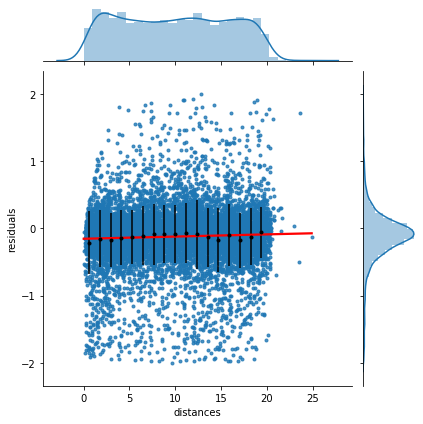

In [3]:
file=np.load('residuals_261.npy',allow_pickle=True)
file=file.item()
data=pd.DataFrame(file)

print(data.head(5))

data=data[abs(data['residuals'])<2]

linfit=linregress(data['distances'],y=data['residuals'])
print('\nSlope =\t\t%.2e' % linfit.slope)
print('Intercept =\t%.3f' % linfit.intercept)

sns.jointplot(x='distances',y='residuals',data=data,kind='reg',ci=None,marker='.',line_kws={'color': 'red'})

x_bins=np.linspace(0,20,18)
y=[]
erry=[]
for i in range(len(x_bins)-1):
    data1=data[data['distances']>=x_bins[i]]
    ys=data1[data1['distances']<=x_bins[i+1]]['residuals']
    y.append(ys.mean())
    erry.append(ys.std())
x=[(x_bins[i]+x_bins[i+1])/2 for i in range(len(x_bins)-1)]

plt.errorbar(x,y,erry,fmt='k.')